4.3011304664405055


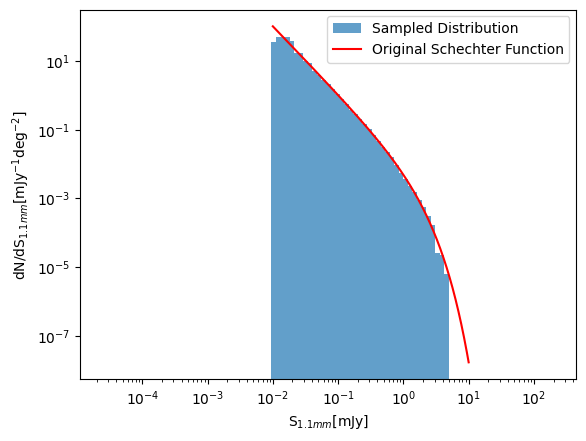

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# 1. Define the Schechter function
def schechter(S, N_star, s_star, alpha):
    return (N_star/s_star) * (S/s_star)**alpha * np.exp(-S/s_star)

# Updated parameters for the Schechter function
N_star = 2290  #deg^-2
s_star = 1.12  #mJy
alpha = -1.97

S = np.linspace(1e-2, 10, 1000)  # Luminosity values
original_pdf = schechter(S, N_star, s_star, alpha)

# 2. Numerically integrate to get the CDF
cdf = np.zeros_like(S)
for i, l in enumerate(S):
    cdf[i], _ = quad(schechter, 1e-2, l, args=(N_star, s_star, alpha))

# 3. Sample from the distribution using the CDF
num_samples = 218361  # Number of random samples
uniform_random_samples = np.random.uniform(0, max(cdf), num_samples)
sampled_S_values = np.interp(uniform_random_samples, cdf, S)
print(np.max(sampled_S_values))
# 4. Plot a histogram of the samples
log_min = np.log(min(S))
log_max = np.log(max(S))
log_bins = np.logspace(log_min, log_max, 100)  # Create logarithmically spaced bins

plt.hist(sampled_S_values, bins=log_bins, density=True, alpha=0.7, label="Sampled Distribution")
plt.plot(S, original_pdf/218361, 'r-', label="Original Schechter Function")

plt.xscale('log')
plt.yscale('log')

plt.xlabel("S$_{1.1mm}$[mJy]")
plt.ylabel("dN/dS$_{1.1mm}$[mJy$^{-1}$deg$^{-2}$]")
plt.legend()
plt.show()



Total number of luminosity sources: 218361.5735107638


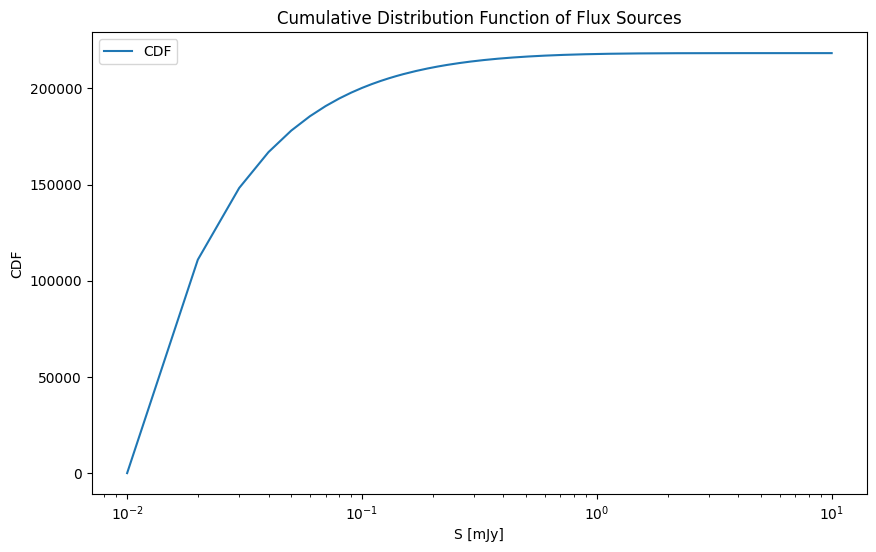

In [2]:
# 1. Define the Schechter function
def schechter(S, N_star, s_star, alpha):
    return (N_star/s_star) * (S/s_star)**alpha * np.exp(-S/s_star)

# Updated parameters for the Schechter function
N_star = 2290  #deg^-2
s_star = 1.12  #mJy
alpha = -1.97

S = np.linspace(1e-2, 10, 1000)  # Luminosity values

# 2. Numerically integrate to get the CDF
cdf = np.zeros_like(S)
for i, l in enumerate(S):
    cdf[i], _ = quad(schechter, 1e-2, l, args=(N_star, s_star, alpha))

# 3. Display the number of luminosity sources
print(f"Total number of luminosity sources: {np.max(cdf)}")

# 4. Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(S, cdf, label='CDF')
plt.xscale('log')
plt.xlabel('S [mJy]')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Flux Sources')
plt.legend()
plt.show()

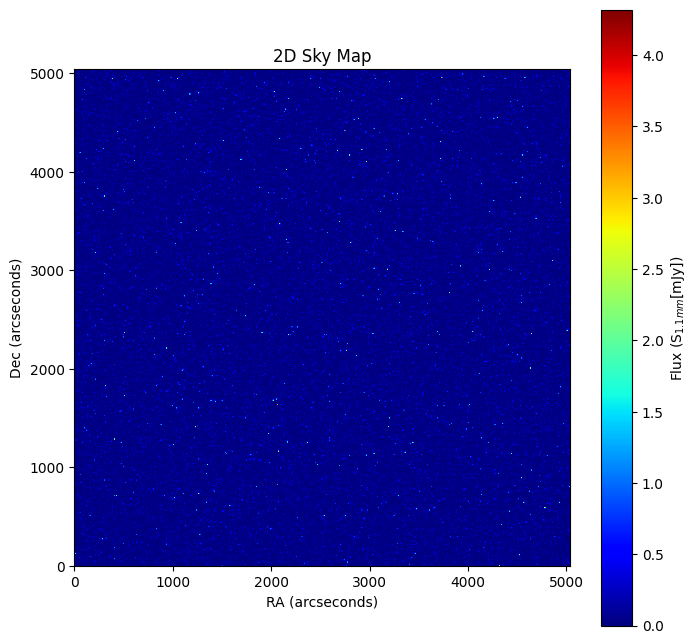

In [3]:

from matplotlib.colors import LogNorm

# Adjusted pixel scale for the new size
beam_width = 45.0  # in arcseconds

pixel_scale = beam_width / 4.0  # 1/4 of the beam width, which means 11.25 arcseconds per pixel


sky_coverage_arcseconds = 5040  #arcseconds   #540 arcseconds for smoothed histogram 

# Calculate the size of the sky map based on the pixel scale
sky_map_size = int(sky_coverage_arcseconds / pixel_scale)

# Generate random RA and Dec coordinates for each source in terms of arcseconds
random_ra = np.random.uniform(0, sky_coverage_arcseconds, num_samples) 
random_dec = np.random.uniform(0, sky_coverage_arcseconds, num_samples)

# Convert RA and Dec values to pixel indices
ra_pixel_indices = (random_ra / pixel_scale).astype(int)
dec_pixel_indices = (random_dec / pixel_scale).astype(int)

# Initialize the sky map
sky_map = np.zeros((sky_map_size, sky_map_size))

# Populate the sky map with sampled flux values
for i in range(num_samples):
    sky_map[ra_pixel_indices[i], dec_pixel_indices[i]] += sampled_S_values[i]

# Visualize the 2D sky map as pixels
plt.figure(figsize=(8, 8))
plt.imshow(sky_map, origin='lower', cmap='jet', extent=[0, sky_coverage_arcseconds, 0, sky_coverage_arcseconds])
plt.colorbar(label='Flux (S$_{1.1mm}$[mJy])')
plt.title('2D Sky Map')
plt.xlabel('RA (arcseconds)')
plt.ylabel('Dec (arcseconds)')
plt.show()

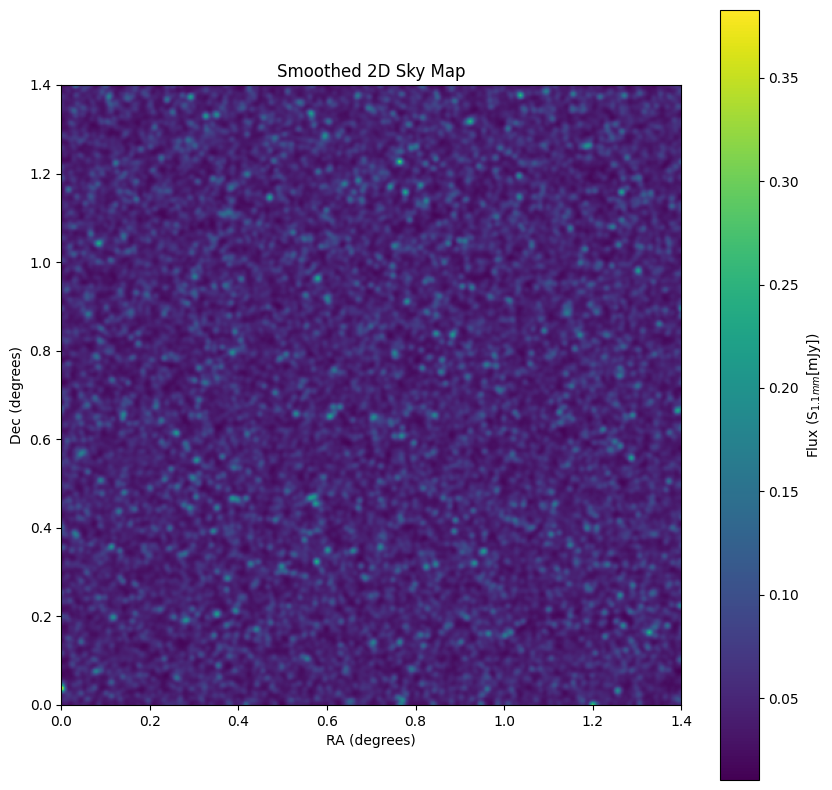

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter


# Define the Gaussian kernel
sigma = (45.0 / pixel_scale) / (2 * np.sqrt(2 * np.log(2)))  # Convert FWHM to standard deviation
smoothed_sky_map = gaussian_filter(sky_map, sigma=sigma)

# Visualize the smoothed 2D sky map
plt.figure(figsize=(10, 10))
plt.imshow(smoothed_sky_map, origin='lower', cmap='viridis', extent=[0, 1.4, 0, 1.4])
plt.colorbar(label='Flux (S$_{1.1mm}$[mJy])')
plt.title('Smoothed 2D Sky Map')
plt.xlabel('RA (degrees)')
plt.ylabel('Dec (degrees)')
plt.show()


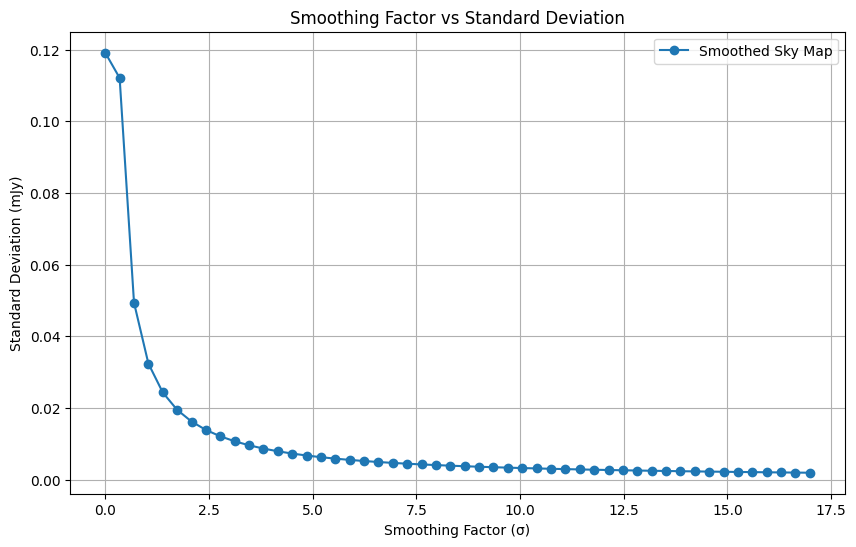

In [5]:


# Create a range of sigma values for smoothing. 
# We can span from no smoothing to heavy smoothing (e.g., from 0 to 10 times the original sigma).
sigma_values = np.linspace(0, 10*sigma, 50)

# Calculate standard deviations for each smoothing level
std_values = []
for s in sigma_values:
    smoothed = gaussian_filter(sky_map, sigma=s)
    std_values.append(smoothed.std())

# Plot smoothing factor vs. standard deviation
plt.figure(figsize=(10, 6))
plt.plot(sigma_values, std_values, 'o-', label="Smoothed Sky Map")
plt.title('Smoothing Factor vs Standard Deviation')
plt.xlabel('Smoothing Factor (σ)')
plt.ylabel('Standard Deviation (mJy)')
plt.legend()
plt.grid(True)
plt.show()


Total intensity before smoothing: 10164.926199068892
Total intensity after smoothing: 10164.92619906889


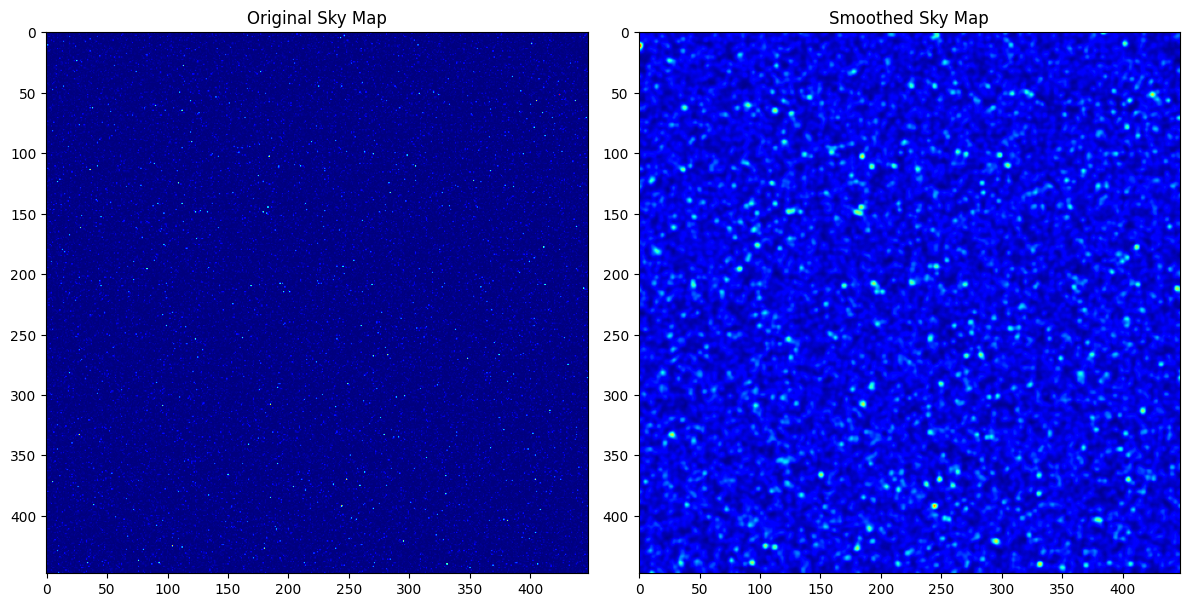

In [7]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Gaussian smoothing parameters
pixel_size_arcsec = 11.25
fwhm_arcsec = 45
sigma_arcsec = (fwhm_arcsec / (2 * np.sqrt(2 * np.log(2)))) - 1
sigma_pixels = sigma_arcsec / pixel_size_arcsec

# Apply Gaussian smoothing
smoothed_sky_map = gaussian_filter(sky_map, sigma_pixels)

# Calculate the total intensity before and after smoothing
total_intensity_before = np.sum(sky_map)
total_intensity_after = np.sum(smoothed_sky_map)

print(f"Total intensity before smoothing: {total_intensity_before}")
print(f"Total intensity after smoothing: {total_intensity_after}")

# Visualization for comparison
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(sky_map, cmap='jet')
axes[0].set_title('Original Sky Map')

axes[1].imshow(smoothed_sky_map, cmap='jet')
axes[1].set_title('Smoothed Sky Map')

plt.tight_layout()
plt.show()


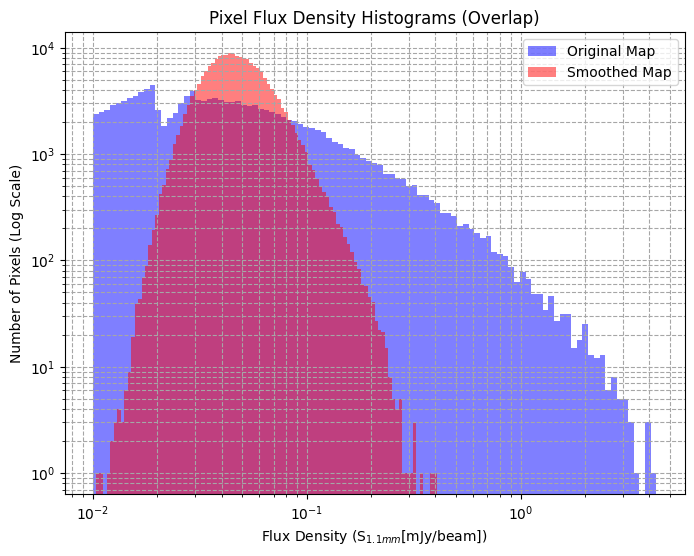

In [8]:
 # 9. Overlap the histograms for the original and smoothed sky maps
plt.figure(figsize=(8, 6))

# Original sky map
plt.hist(sky_map.flatten(), bins=np.logspace(np.log10(0.01), np.log10(sky_map.max()), 100), color='blue', alpha=0.5, log=True, label='Original Map')

# Smoothed sky map
plt.hist(smoothed_sky_map.flatten(), bins=np.logspace(np.log10(0.01), np.log10(smoothed_sky_map.max()), 100), color='red', alpha=0.5, log=True, label='Smoothed Map')

plt.title('Pixel Flux Density Histograms (Overlap)')
plt.xlabel('Flux Density (S$_{1.1mm}$[mJy/beam])') 
plt.ylabel('Number of Pixels (Log Scale)')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend(loc='upper right')  
plt.show()


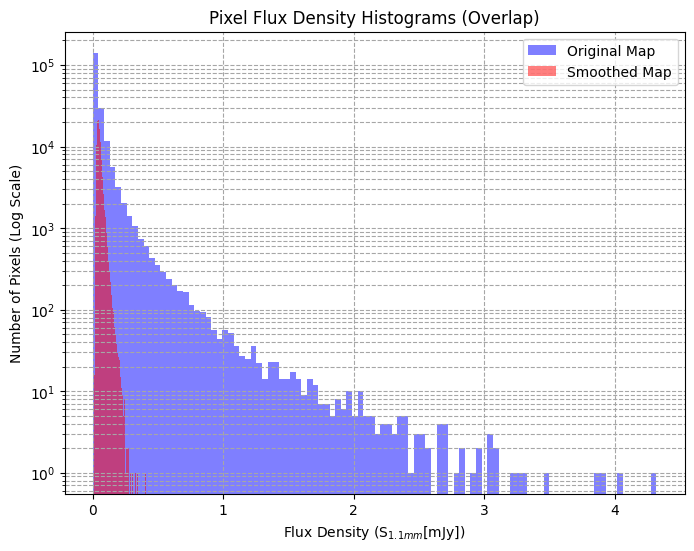

In [9]:
# 9. Overlap the histograms for the original and smoothed sky maps
plt.figure(figsize=(8, 6))

# Original sky map
plt.hist(sky_map.flatten(), bins=100, color='blue', alpha=0.5, log=True, label='Original Map')

# Smoothed sky map
plt.hist(smoothed_sky_map.flatten(), bins=100, color='red', alpha=0.5, log=True, label='Smoothed Map')

plt.title('Pixel Flux Density Histograms (Overlap)')
plt.xlabel('Flux Density (S$_{1.1mm}$[mJy])')
plt.ylabel('Number of Pixels (Log Scale)')
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend(loc='upper right')  
plt.show()


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord

# Read data from text file
data = np.loadtxt('result_catalogue_2022_2023-09-28T08_23_27.txt')
ra = data[:, 0] * u.deg
dec = data[:, 1] * u.deg
flux = data[:, 2] * 1000
print(np.min(flux),"mJy")
print(np.max(flux),"mJy")
# Convert RA and Dec to sky coordinates
coord = SkyCoord(ra, dec)

# Convert RA and Dec to plain NumPy arrays in degrees
ra_deg = coord.ra.deg
dec_deg = coord.dec.deg

# Define the binning parameters for flux
flux_min, flux_max = np.min(flux), np.max(flux)
log_flux_min = np.log10(flux_min)
log_flux_max = np.log10(flux_max)
num_flux_bins = 500

# Create logarithmically spaced bin edges
log_flux_bins = np.logspace(log_flux_min, log_flux_max, num_flux_bins + 1)

# Create the 1D histogram
flux_hist, flux_bins = np.histogram(flux, bins=log_flux_bins)

# Plot the 1D histogram
plt.hist(flux, bins=log_flux_bins, color='skyblue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux [mJy]')
plt.ylabel('Frequency')
plt.title('Flux Distribution (SIDES)')
plt.show()

FileNotFoundError: result_catalogue_2022_2023-09-28T08_23_27.txt not found.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.coordinates import SkyCoord


# Read data from text file
data = np.loadtxt('result_catalogue_2022_2023-09-28T08_23_27.txt')
ra = data[:, 0] * u.deg
dec = data[:, 1] * u.deg
flux = data[:, 2] * 1000

# Convert RA and Dec to sky coordinates
coord = SkyCoord(ra, dec)

# Convert RA and Dec to plain NumPy arrays in degrees
ra_deg = coord.ra.deg
dec_deg = coord.dec.deg

# Define the binning parameters for flux
flux_min, flux_max = np.min(flux), np.max(flux)
log_flux_min = np.log10(flux_min)
log_flux_max = np.log10(flux_max)
num_flux_bins = 500

# Create logarithmically spaced bin edges
log_flux_bins = np.logspace(log_flux_min, log_flux_max, num_flux_bins + 1)

plt.figure(figsize=(10, 7))

# Original sky map histogram
plt.hist(sky_map.flatten(), bins=log_flux_bins, color='blue', alpha=0.5, log=True, label='Analytic Function',density=True)


# Flux histogram
plt.hist(flux, bins=log_flux_bins, color='skyblue', alpha=0.5, log=True, label='Flux Distribution (SIDES)',density=True)

# Plot settings
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux [mJy]')
plt.ylabel('Frequency')
plt.title('Overlay of Flux Distributions')
plt.grid(True, which="both", ls="--", c='0.65')
plt.legend(loc='upper right')
plt.show()


FileNotFoundError: result_catalogue_2022_2023-09-28T08_23_27.txt not found.

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# Assuming sky_map contains the data from the Schechter function:
hist1_values, bin_edges = np.histogram(sky_map.flatten(), bins=log_flux_bins, density=True)

# And flux contains the data from your actual observations:
hist2_values, _ = np.histogram(flux, bins=log_flux_bins, density=True)

# Define a function that gives the histogram values for given parameters:
def modeled_histogram(S, N_star, alpha):
    return schechter(S, N_star, s_star, alpha)  

# Use curve_fit to fit hist1 onto hist2
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
params, _ = curve_fit(modeled_histogram, bin_centers, hist2_values, p0=[s_star, alpha])

best_s_star, best_alpha = params

print("Best s_star:", best_s_star)
print("Best alpha:", best_alpha)

# Plot the best fit histogram alongside the data
plt.figure(figsize=(10, 7))

plt.hist(sky_map.flatten(), bins=log_flux_bins, color='blue', alpha=0.5, label='Analytic Function',density=True)
plt.hist(flux, bins=log_flux_bins, color='skyblue', alpha=0.5, label='Flux Distribution (SIDES)',density=True)

# Best fit curve
S_values = np.logspace(np.log10(flux_min), np.log10(flux_max), 500)
plt.plot(S_values, modeled_histogram(S_values, best_N_star, best_alpha), 'r-', label='Best Fit')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flux [mJy]')
plt.ylabel('Frequency')
plt.title('Histogram with Best Fit Curve')
plt.legend()
plt.show()


NameError: name 'log_flux_bins' is not defined